We start by loading the labels and fourier features extracted the time series. The extracting process took more than a day to run.

In [2]:
import numpy as np
feats = np.load("E:/DOWNLOADS/fourier10.npy")
labs = np.load("E:/DOWNLOADS/true_labels.npy")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.ensemble as ske

ModuleNotFoundError: No module named 'matplotlib'

We look at the Fourier features for some of the rarer classes:

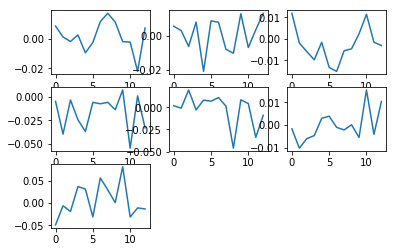

In [96]:
a = np.where([labs == 12])[1]
for i in range(0, 7):
    #r = np.random.randint(feats.shape[0])
    r = a[i]
    plt.subplot(330 + 1 + i)
    plt.plot(feats[r,2:15])
# show the plot
plt.show();

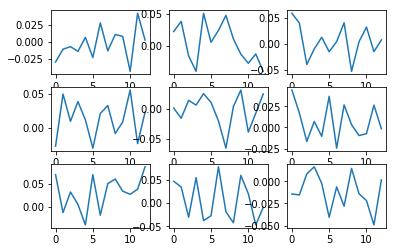

In [100]:
a = np.where([labs == 15])[1]
for i in range(0, 9):
    #r = np.random.randint(feats.shape[0])
    r = a[i]
    plt.subplot(330 + 1 + i)
    plt.plot(feats[r,2:15])
# show the plot
plt.show();

We divide the full data into test-train. We carefully choose a fixed proportion, say $0.1$, of representatives from every class in our training data. This ensures that the training will allow information from the rarer classes to seep in.

In [277]:
np.random.seed(100)
probb = 0.1
test = []
for i in set(labs):
    a = np.where([labs == i])[1]
    test.append(np.random.choice(a, size=int(np.ceil(len(a)*probb))))

In [278]:
import itertools 
test_ind = list(itertools.chain(*test))
train_ind = np.setdiff1d(np.arange(len(labs)), test_ind)

In [279]:
min_class_size = 5000
oversamp = np.arange(len(train_ind))
for i in set(labs):
    a = np.where([labs[train_ind] == i])[1]
    ntimes = int(np.ceil(min_class_size / len(a)) - 1) 
    for i in np.arange(ntimes):
        oversamp = np.append(oversamp, a)

In [280]:
Counter(labs[train_ind])

Counter({5: 4907,
         1: 27673,
         4: 2193,
         13: 461,
         6: 452,
         2: 4212,
         8: 1366,
         17: 137,
         10: 112,
         3: 252,
         14: 128,
         11: 218,
         16: 77,
         9: 56,
         7: 64,
         12: 6,
         15: 22})

In [ ]:
Counter(labs[train_ind[oversamp]])

In [282]:
rf = ske.RandomForestClassifier(random_state = 10).fit(feats[train_ind,:], labs[train_ind])

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


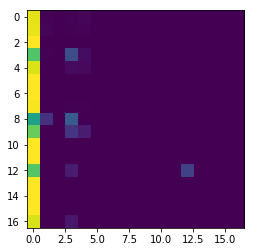

In [283]:
from sklearn import metrics
cm = metrics.confusion_matrix(labs[test_ind], rf.predict(feats[test_ind,:]))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm);

In [284]:
sum(labs[test_ind] == rf.predict(feats[test_ind,:]))/ len(test_ind)

0.6444254956299297

In [285]:
sum(labs[test_ind] == 1)/ len(test_ind)

0.6523129396717118

In [268]:
import sklearn.linear_model as sklm

In [276]:
lreg = sklm.LogisticRegressionCV().fit(feats[train_ind,:],labs[train_ind])

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit

C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bkidd\AppData\Local\Continuum\anaconda3\envs\tf\lib\sit